In [9]:
import numpy as np
ITER_RANGE = 500
KNAPSACK_CAP = 750
NUMBER_OF_OBJECTS = 15
KNAPSACK_WEIGHT = np.array([70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120])
KNAPSACK_PROFIT = np.array([135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240])

OPTIMAL_SELECTION =  np.array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1])
OPTIMAL_PROFIT = 1458

In [10]:
def getSumOfWeight(arr: np.ndarray):
    weight = np.dot(KNAPSACK_WEIGHT, arr)
    return np.sum(weight)

def getSumOfProfit(arr: np.ndarray):
    profit = np.dot(KNAPSACK_PROFIT, arr)
    return np.sum(profit)

def getNeighborhood(arr: np.ndarray):
    # Get a copy of arr * NUMBER_OF_OBJECTS
    nn = np.repeat(arr, repeats=NUMBER_OF_OBJECTS, axis=0).reshape((NUMBER_OF_OBJECTS,NUMBER_OF_OBJECTS)).transpose()
    for i in range(NUMBER_OF_OBJECTS):
        nn[i][i] = not nn[i][i]
        ()
    return nn

### Hill Climbing Algo

In [11]:
import random
# selection one
s1 = np.zeros((NUMBER_OF_OBJECTS), dtype=int)
historySelection1 = np.zeros(ITER_RANGE, dtype=int)

while(1):
    seed = random.randint(0, NUMBER_OF_OBJECTS - 1)
    s1[seed] = 1
    np.random.shuffle(s1)
    if  KNAPSACK_CAP > getSumOfWeight(s1):
        break
    ()

In [12]:
for x in range(ITER_RANGE):
    iterMaxProfit = getSumOfProfit(s1)
    nn = getNeighborhood(s1)
    np.random.shuffle(nn)
    for i in range(NUMBER_OF_OBJECTS):
        if  KNAPSACK_CAP > getSumOfWeight(nn[i]):
            nProfit = getSumOfProfit(nn[i])
            if  iterMaxProfit < nProfit:
                s1 = nn[i]
                iterMaxProfit = nProfit
                break
                ()
            ()
        ()
    historySelection1[x] = iterMaxProfit
    ()

### Simulated Annealing Algo
http://debussy.im.nuu.edu.tw/sjchen/ML_final.html
http://debussy.im.nuu.edu.tw/sjchen/MachineLearning/final/Opt_SA.pdf

In [13]:
# selection two
s2 = np.zeros((NUMBER_OF_OBJECTS), dtype=int)
historySelection2 = np.zeros(ITER_RANGE, dtype=int)

while(1):
    seed = random.randint(0, NUMBER_OF_OBJECTS - 1)
    s2[seed] = 1
    np.random.shuffle(s2)
    if  KNAPSACK_CAP > getSumOfWeight(s2):
        break
    ()

In [14]:
def shouldAccept(num: int):
    return 125 < num and num < 375
    ()

for x in range(ITER_RANGE):
    iterMaxProfit = getSumOfProfit(s2)
    nn = getNeighborhood(s2)
    np.random.shuffle(nn)
    for i in range(NUMBER_OF_OBJECTS):
        if  KNAPSACK_CAP > getSumOfWeight(nn[i]):
            nProfit = getSumOfProfit(nn[i])
            if  iterMaxProfit < nProfit or shouldAccept(x):
                s2 = nn[i]
                iterMaxProfit = nProfit
                break
                ()
            ()
    historySelection2[x] = iterMaxProfit
    ()

In [15]:
print(historySelection1[ITER_RANGE - 1])
print(historySelection2[ITER_RANGE - 1])

1334
1345


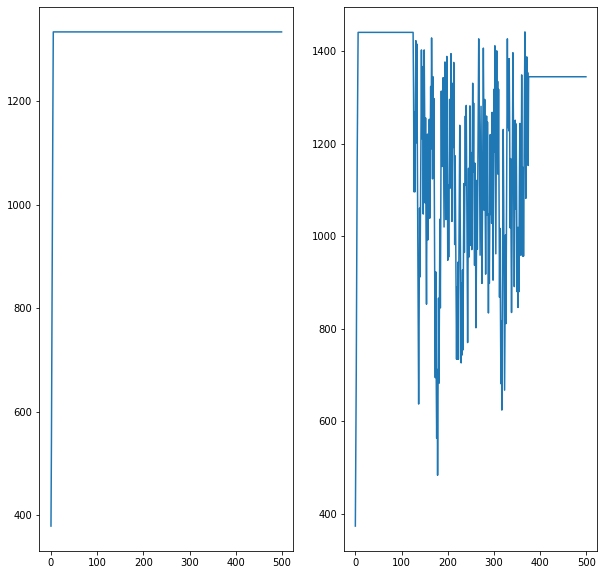

In [16]:
import matplotlib.pyplot as plt
iterRange = range(ITER_RANGE)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

plt.plot(iterRange, historySelection1)

plt.subplot(1,2,2)
plt.plot(iterRange, historySelection2)

plt.show()